<a href="https://colab.research.google.com/github/Nicompag/ISYS5002_ELP_20201867/blob/main/ISYS5002_ELP_20201867.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. A comment is an explanation or annotation in the source code of a computer program. Well commented functions are helpful to other programmers to understand the code better. The following function has no comments. Add some comments that explain the purpose and actions of the code in the following method.

In [ ]:
def get_url(search_term, template): #this line defines a function. The function takes two inputs: search_term and template
  search_term = search_term.replace(' ', '+') #this line replaces all ' ' in the input search_term with '+' and stores it in the variable search_term
  url = template.format(search_term) #this line replaces '{}' in the input template with the variable search_term and stores it in the variable url
  url += '&page={}' #this line adds '&page={}' to the end of the variable url
  return url #this line returns the variable url 


3. In computer programming there are three kinds of errors: syntax errors, runtime errors, and logic errors. The code fragment below is meant to calculate a car’s fuel economy after reading in the distance travelled and amount of petrol used. The fuel economy is calculated by the following formula: kmPerLitre = kilometers / litres. The code fragment contains both syntax and logic errors. Identify and correct at least five errors in the following code.

In [ ]:
#Original code

def efficiency(dist, gas) #after the the first line of the function must be a ':'
    return dist/gas #is too much indented (2 indents instead of 1)

km = input ("How far did your car travel? (In kilometers?) ) #there is a '"' missing after the second last bracket, the input must be type float or int to perform the calculation of the defined function
liters = input ("How much gas did you use? (In liters)" #there is a bracket ")" missing at the end, the input must be type float or int to perform the calculation of the defined function

MPG = efficiency(dist_traveled, Liters) #the variable dist_traveled is not defined, it should be the variable km, the variable Liters is not defined, it should be liters as python is case sensitive
print MPG #there are two brackets missing "(" and ")"

In [ ]:
#Correct code

def efficiency(dist, gas):
  return dist/gas

km = float(input("How far did your car travel? (In kilometers?)" ))
liters = float(input ("How much gas did you use? (In liters)"))

MPG = efficiency(km, liters)
print(MPG)


5. Write a program the reads in sales.csv and calculates the maximum, minimum and average profit for each country in the Australia and Oceania region. For each country in the Australia and Oceania region the plot their total profit. (Hint: read the CSV into a Pandas dataframe, create a new dataframe for the region, and use the new dataframe for the calculations and bar chart)

                           Country  Total Profit  Maximum Profit  \
0                           Tuvalu     951410.50       951410.50   
5                  Solomon Islands     285087.64       285087.64   
19                      East Timor     337937.60       337937.60   
23                     New Zealand       5270.67         5270.67   
26                        Kiribati      13009.18        13009.18   
32                       Australia     576605.12       369155.00   
56                            Fiji     727423.20       727423.20   
76  Federated States of Micronesia     146875.14       146875.14   
79                          Samoa     1678540.98      1678540.98   

    Minimum Profit  Average Profit  
0        951410.50       951410.50  
5        285087.64       285087.64  
19       337937.60       337937.60  
23         5270.67         5270.67  
26        13009.18        13009.18  
32        60418.38       192201.71  
56       727423.20       727423.20  
76       146875.14     

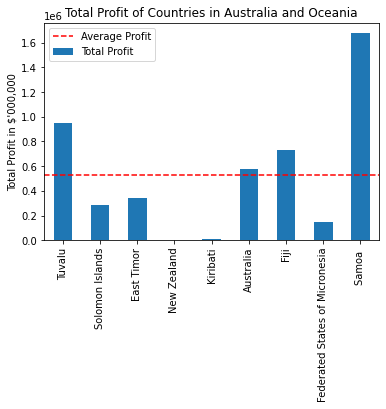

In [16]:
#Country wise calculation

#import modules
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('sales.csv') #import the data from the csv file
raw_data = data.loc[data["Region"] == "Australia and Oceania"] #create a dataframe that only consists of countries from the region Australia and Oceania

region = pd.DataFrame() #create a new and empty dataframe

#Copy the information that is needed from the region dataframe to the new one
region["Country"] = raw_data["Country"]
region["Total Profit"] = raw_data["Total Profit"]

aus = region.loc[region["Country"] == "Australia"] #create a dataframe that consists only of Australian orders
aus_mean = round(aus["Total Profit"].mean(),2) #calculate the mean of the Australian orders, round it to 2 decimals
aus_min = aus["Total Profit"].min() #get the minimum Australian order
aus_max = aus["Total Profit"].max() #get the maximum Australian order
aus_total = aus["Total Profit"].sum() #get the sum of all Australian orders

region = region.drop_duplicates(subset = ["Country"], keep = "first") #delete double entries in the region dataframe
region["Maximum Profit"] = region["Total Profit"] #create a new column Maximum Profit and set it equal to the column Total Profit
region["Minimum Profit"] = region["Total Profit"] #create a new column Minumum Profit and set it equal to the column Total Profit
region["Average Profit"] = region["Total Profit"] #create a new column Average Profit and set it equal to Total Profit

region.at[32,"Maximum Profit"] = aus_max #update the Maximum Profit value for Australia with the calculated maximum value
region.at[32,"Minimum Profit"] = aus_min #update the Minimum Profit value for Australia with the calculated minimum value
region.at[32,"Average Profit"] = aus_mean #update the Average Profit value for Australia with the calculated average value
region.at[32,"Total Profit"] = aus_total #update the Total Profit value for Australia with the calculated total value

mean_profit = round(region["Total Profit"].mean(),2) #create a variable that stores the average profit among all countries in the region

pd.set_option('display.max_columns', None) #change the options so that all columns are visible
print(region, "\n") #output the dataframe region, have an empty line after it

ax = region.plot.bar(x='Country', y='Total Profit') #create a bar graph with the countries on the x axis and the Total Profit on the y axis
plt.ylabel("Total Profit in $'000,000") #update the y axis label
plt.xlabel("") #remove the x axis label
plt.axhline(y=mean_profit, color='r', linestyle='--', label = "Average Profit") #create a horizontal dashed line and give it the label average profit
plt.title("Total Profit of Countries in Australia and Oceania") #create a title for the graph
plt.legend() #show the legend on the graph
plt.show() #show the graph

                           Country  Total Profit
0                           Tuvalu     951410.50
5                  Solomon Islands     285087.64
19                      East Timor     337937.60
23                     New Zealand       5270.67
26                        Kiribati      13009.18
32                       Australia     576605.12
56                            Fiji     727423.20
76  Federated States of Micronesia     146875.14
79                          Samoa     1678540.98 

                  Region  Maximum Profit  Minumum Profit  Average Profit
0  Australia and Oceania      1678540.98         5270.67       524684.45 



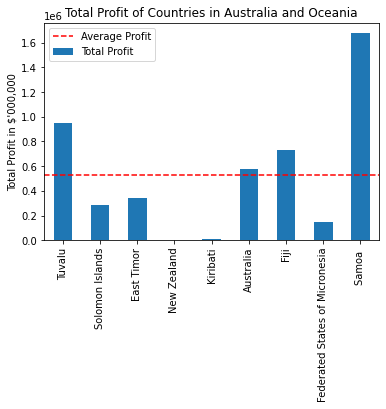

In [17]:
#Region wise calculation

#import modules
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('sales.csv') #import the data from the csv file
raw_data = data.loc[data["Region"] == "Australia and Oceania"] #create a dataframe that only consists of countries from the region Australia and Oceania

region = pd.DataFrame() #create a new and empty dataframe

#Copy the information that is needed from the region dataframe to the new one
region["Country"] = raw_data["Country"]
region["Total Profit"] = raw_data["Total Profit"]

aus = region.loc[region["Country"] == "Australia"] #create a dataframe that consists only of Australian orders
aus_total = aus["Total Profit"].sum() #get the sum of all Australian orders

region = region.drop_duplicates(subset = ["Country"], keep = "first") #delete double entries in the region dataframe
region.at[32,"Total Profit"] = aus_total #update the Total Profit value for Australia with the calculated total value

aus_and_oce = pd.DataFrame() #create an empty dataframe
aus_and_oce["Region"] = ["Australia and Oceania"] #create a new column and call it Australia and Oceania
aus_and_oce["Maximum Profit"] = region["Total Profit"].max() #create a new column and store the maximum profit of all total profits from the region dataframe
aus_and_oce["Minumum Profit"] = region["Total Profit"].min() #create a new column and store the minimum profit of all total profits from the region dataframe
aus_and_oce["Average Profit"] = round(region["Total Profit"].mean(),2) #create a new column and store the average profit of all total profits from the region dataframe, round it to 2 decimals

mean_profit = round(region["Total Profit"].mean(),2) #create a variable that stores the average profit among all countries in the region

pd.set_option('display.max_columns', None) #change the options so that all columns are visible
print(region, "\n") #output the region dataframe, have an empty line after it 
print(aus_and_oce, "\n") #output the aus_and_oce dataframe, have an empty line after it 

ax = region.plot.bar(x='Country', y='Total Profit') #create a bar graph with the countries on the x axis and the Total Profit on the y axis
plt.ylabel("Total Profit in $'000,000") #update the y axis label
plt.xlabel("") #remove the x axis label
plt.axhline(y=mean_profit, color='r', linestyle='--', label = "Average Profit") #create a horizontal dashed line and give it the label average profit
plt.title("Total Profit of Countries in Australia and Oceania") #create a title for the graph
plt.legend() #show the legend on the graph
plt.show() #show the graph